<a href="https://colab.research.google.com/github/Mayank-Patel-9/Machine-Learning/blob/main/P4_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
# Replace 'house_prices.csv' with the actual path to your dataset
data = pd.read_csv('House Price India.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Data Preprocessing
# Assume 'Square_Feet', 'Bedrooms', and 'Age' are features, and 'Price' is the target
X = data[['living area', 'number of bedrooms', 'number of floors', 'lot area', 'Built Year', 'Number of schools nearby', 'Distance from the airport', 'Area of the house(excluding basement)', 'Area of the basement', 'grade of the house', 'condition of the house']]  # Independent variables
y = data['Price']  # Target variable

# Handle missing values if any (drop rows with missing values for simplicity)
X = X.dropna()
y = y[X.index]

#data.dropna(inplace=True)
#print(data.isnull().sum())

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (optional but recommended for models with large variation in features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)



           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

In [ ]:
# Evaluate the model
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Print the R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Absolute Error (MAE): 143389.98160756694
Mean Squared Error (MSE): 50415238460.10236
Root Mean Squared Error (RMSE): 224533.37938957397
R-squared: 0.6422394692708866


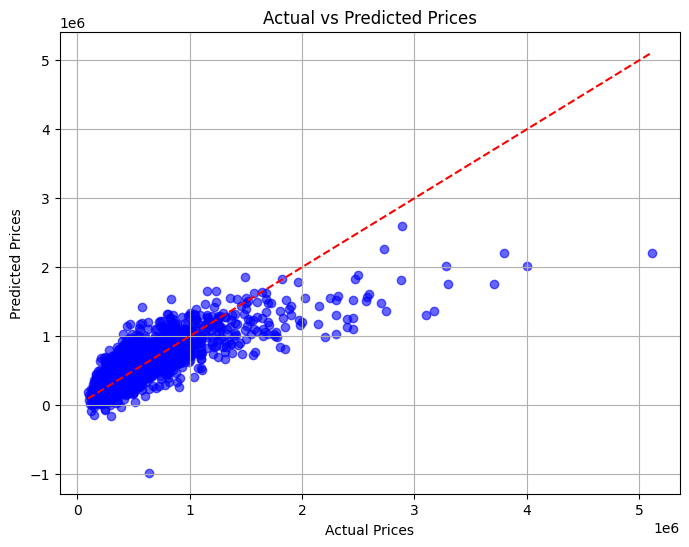

In [ ]:
# Visualization of Actual vs Predicted Price

import matplotlib.pyplot as plt

# Plotting the Actual vs Predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)  # Scatter plot of actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()


**BONUS ASSIGNMENT**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('House Price India.csv')

# Dropping unnecessary columns
data.drop(['id', 'Date', 'Postal Code'], axis=1, inplace=True)

# Splitting features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Evaluate KNN for different k values
k_values = [3, 5, 7]
knn_results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    knn_results.append(calculate_metrics(y_test, y_pred))

# Evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
lr_results = calculate_metrics(y_test, y_pred_lr)

# Prepare the results in a readable format
result_df = pd.DataFrame(knn_results, columns=['MAE', 'MSE', 'RMSE'], index=[f'KNN (k={k})' for k in k_values])
lr_result_df = pd.DataFrame([lr_results], columns=['MAE', 'MSE', 'RMSE'], index=['Linear Regression'])

# Combine results
final_result_df = pd.concat([result_df, lr_result_df])
final_result_df


,MAE,MSE,RMSE
KNN (k=3),101166.430803,3.223073e+10,179529.199847
KNN (k=5),97546.394528,3.084152e+10,175617.552095
KNN (k=7),96557.319279,3.009941e+10,173491.821584
Linear Regression,124303.417540,3.964767e+10,199117.220783
